# Introduction 
This notebook looks into using various python machine learning and data science libraries to build a model capable of predicting whether a fetus is normal or abnormal based on CTG data in order to prevent maternal or child death. 

We're going to take the following approach: 
1. Problem definition 
2. About the Data  
3. Features
4. Data Preparation and EDA
5. Modeliing 
6. Evaluation Metrics
7. Conclusion 


# 1. Problem Definition
Given cliinical parameters about a fetus, can we predict whether it is normal, suspect or patholoigical? 

# 2. About the Data 
The original data came from features gotten from 2126 cardiotocogram exams of pregnant women and is available on https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

# 3. Features 
**Create data dictionary**
1.	baseline value - baseline fetal heart rate (FHR)
2.	accelerations - number of accelerations per second
3.	fetal movement – number of fetal movements per second
4.	uterine contractions – number of uterine contractions per second 
5.	light decelerations – number of LDs per second 
6.	severe decelerations – number of SDs per second 
7.	prolonged decelerations – number of PDs per second 
8.	abnormal short-term variability – percentage of time with abnormal short-term variability 
9.	mean value of short-term variability 
10.	percentage of time with abnormal long-term variability 
11. Histogram_width = Width of the histogram made using all values from a record
12. Histogram_min = Histogram minimum value
13. Histogram_max = Histogram maximum value
14. Histogram_number_of_peaks  = Number of peaks in the exam histogram
15. Histogram_number_of_zeroes = Number of zeroes in the exam histogram
16. Histogram_mode = Hist mode
17. Histogram_mean = Hist mean
18. Histogram_median = Hist Median
19. Histogram_variance = Hist variance
20. Histogram_tendency = Histogram trend
21. Fetal health:
    - Normal: 1
    - Suspect: 2
    - Pathological: 3


# 4. Data Preparation and EDA

## Import all tools to be used 

In [ ]:
# Regular exploratory analysis tools 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Models from scikit learn as needed according to scikit map 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Model evaluation tools from sklearn 
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve 
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 
from sklearn import model_selection
# Models from keras as needed 
from keras.models import Sequential 
from keras.utils import np_utils 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation 

# Make numpy values easier to read 
np.set_printoptions(precision = 3, suppress = True)

# Check version of tensorflow 
print(tf.__version__) 

2.8.2


## Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fetal Health /fetal_health.csv', low_memory = False)
print(f'fetal health dataset has shape: {df.shape}')

fetal health dataset has shape: (2126, 22)


## EDA


In [ ]:
# See a sample of the dataset 
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# See the description of the data 
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


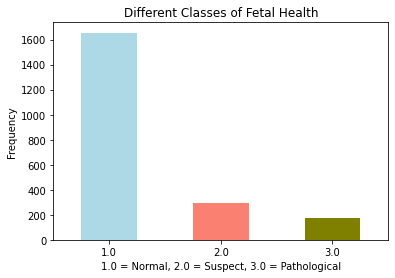

In [ ]:
# see value counts of the fetal health classifications and visualize it
df.fetal_health.value_counts()

# Visualize the different classes of fetal health 
df.fetal_health.value_counts().plot(kind = 'bar', 
                                    color = ['lightblue', 'salmon', 'olive'])

# Adding attributes to the graph
plt.title('Different Classes of Fetal Health')
plt.xlabel('1.0 = Normal, 2.0 = Suspect, 3.0 = Pathological')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show();

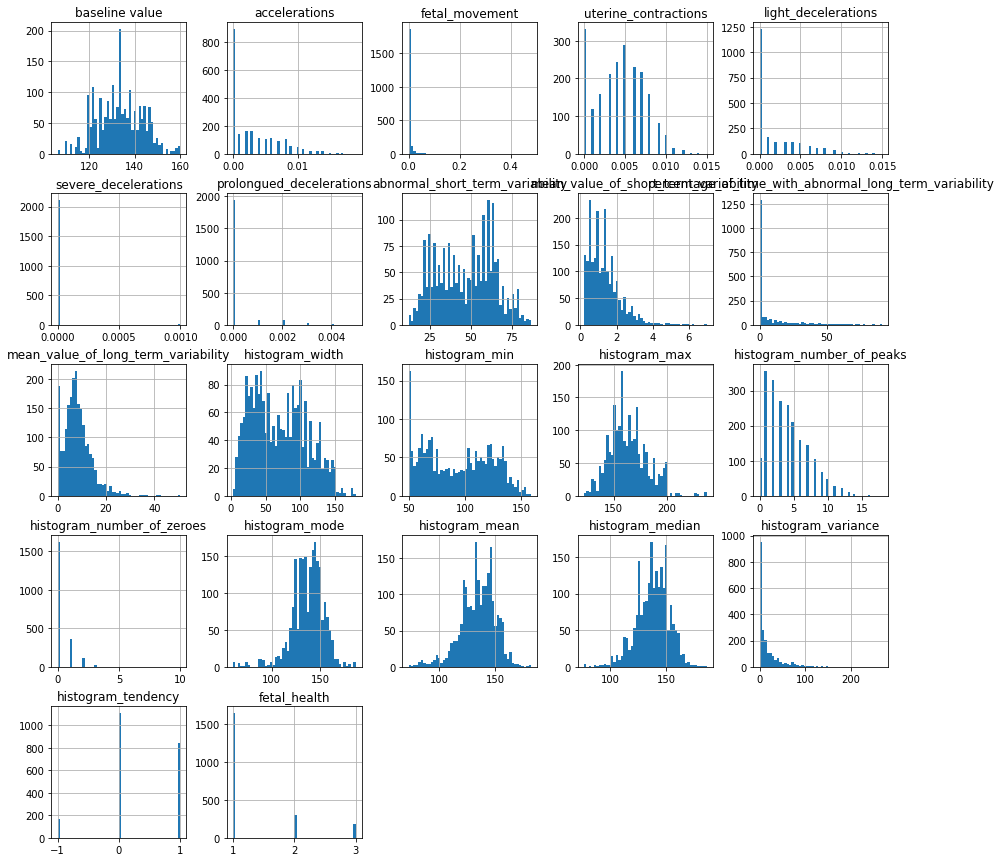

In [ ]:
df.hist(bins = 50, figsize = (15, 15));

### Fetal status according to uterine contractions 
In this section, we will be comparing fetal health to uterine contractions to see if there are any correlations

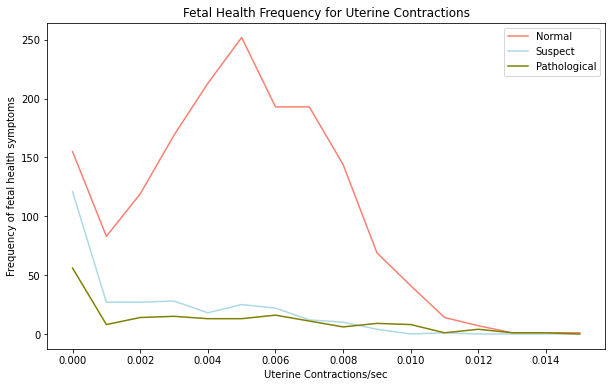

In [ ]:
pd.crosstab(df.uterine_contractions, df.fetal_health).plot(kind = 'line',
                                                          figsize = (10, 6),
                                                          color = ['salmon', 'lightblue', 'olive'])
#Adding attributes 
plt.title('Fetal Health Frequency for Uterine Contractions')
plt.xlabel('Uterine Contractions/sec')
plt.ylabel('Frequency of fetal health symptoms')
plt.xticks(rotation = 0)
plt.legend(['Normal', 'Suspect', 'Pathological'])
plt.show();

From the figure above, normal fetal health is highest when the uterine contractions per sec is at 0.004. Suspect and pathological fetal health is highest when the uterine contractions are at 0. 

### Fetal health according to accelerations 
In this section, we will be comparing accelerations to fetal health for correlations.

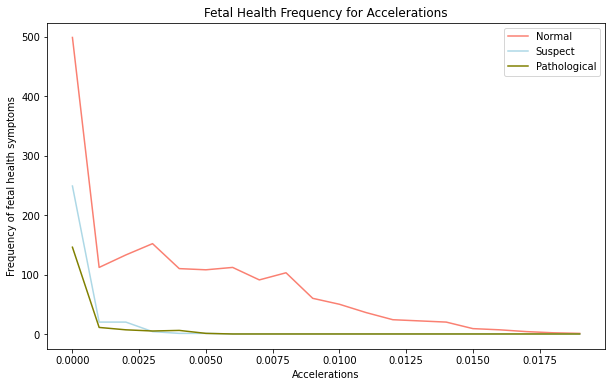

In [ ]:
pd.crosstab(df.accelerations, df.fetal_health).plot(kind = 'line',
                                                    figsize = (10, 6),
                                                    color = ['salmon', 'lightblue', 'olive'])
#Adding attributes 
plt.title('Fetal Health Frequency for Accelerations')
plt.xlabel('Accelerations')
plt.ylabel('Frequency of fetal health symptoms')
plt.xticks(rotation = 0)
plt.legend(['Normal', 'Suspect', 'Pathological'])
plt.show();

### Correlation Matrix 
To see a full picture of the correlation between all independent variables and fetal health, a correlation matrix is neccesary. Colors for the matrix can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html

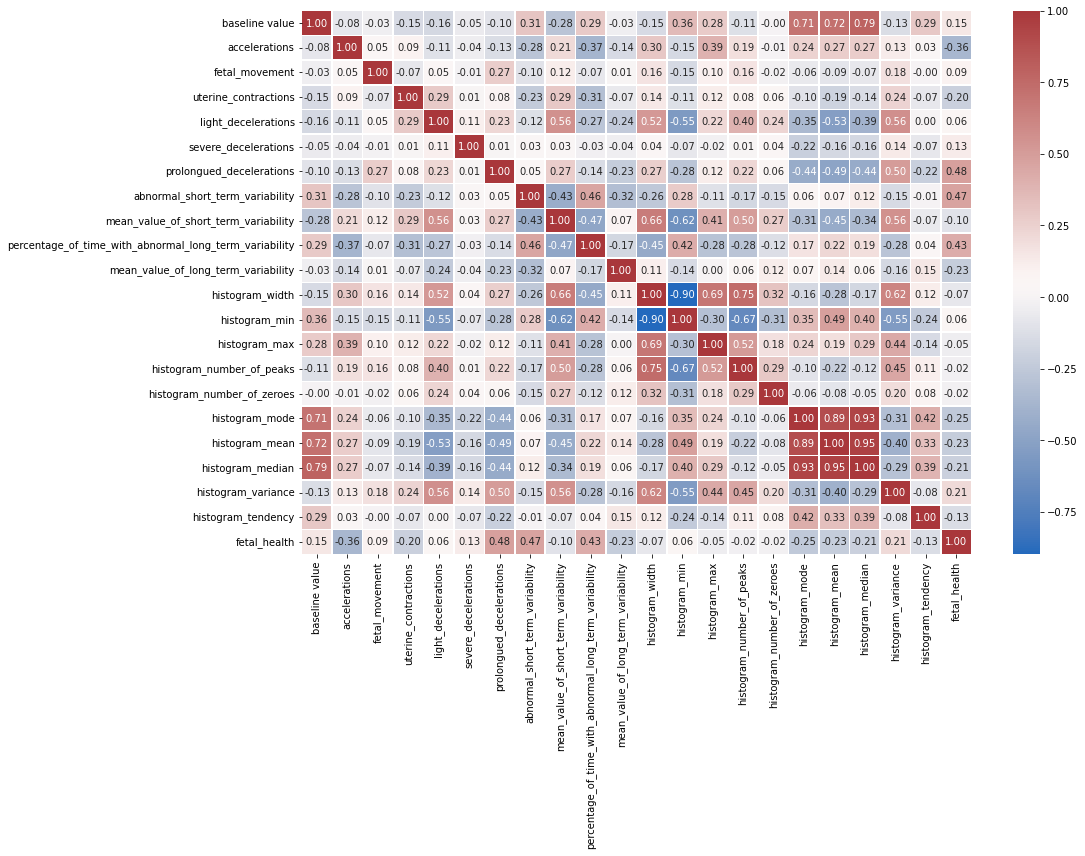

In [ ]:
# Find the correlation between the indpendent values 
corr_matrix = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths = 0.5,
            fmt = '.2f',
            cmap = 'vlag'); #changes the color of the matrix

The correlation matrix above shows that prolongued decelerations have the highest correlation to fetal health closely followed by abnormal short term variability.

In [ ]:
df.accelerations.head()

0    0.000
1    0.006
2    0.003
3    0.003
4    0.007
Name: accelerations, dtype: float64

## Split the data into training, test and validation datasets
https://www.malicksarr.com/split-train-test-validation-python/


In [ ]:
# Split data into x and y 
x = df.drop('fetal_health', axis = 1) #separates fetal health from the other columns 
y = df['fetal_health'] #isolates fetal health as the target column

In [ ]:
np.random.seed(42) #sets a fixed return of the same set of random numbers 

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    shuffle = True, 
                                                    test_size = 0.2,
                                                    random_state = 42) #assigns 20% of the data as the test data 

# Split training data into validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.25,
                                                  random_state = 42)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_val shape: {}'.format(x_val.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_val shape: {}'.format(y_val.shape))

x_train shape: (1275, 21)
x_test shape: (426, 21)
x_val shape: (425, 21)
y_train shape: (1275,)
y_test shape: (426,)
y_val shape: (425,)


In [ ]:
y_train

957     1.0
726     2.0
158     1.0
169     1.0
157     1.0
       ... 
1276    1.0
1662    1.0
989     1.0
1224    1.0
1687    1.0
Name: fetal_health, Length: 1275, dtype: float64

In [ ]:
y_val

1589    1.0
266     1.0
1017    1.0
2049    1.0
569     1.0
       ... 
1668    1.0
362     2.0
502     1.0
330     2.0
1266    1.0
Name: fetal_health, Length: 425, dtype: float64

# 5. Modelling 
In this section we will be using and evaluating some models to see the best model for predicting fetal health in our dataset. 

## Analyze different models on their accuracy

In [ ]:
# Create a function to fit and score models all at once 
model = {'LogReg': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RF': RandomForestClassifier(),
          'SVM': SVC(),
          'GNB': GaussianNB(),
          'XGB': XGBClassifier()}


# Create a function to fit and score the models selected 
def fit_and_score(model, x_train, x_val, y_train, y_val):
    '''
    Fits and evaluates selected machine learning models, 
    models: a dict of different scikit learn machine learning models
    x_train:training data 
    x_val: validation data 
    y_train: training labels
    y_val: validation labels 
    '''
    # Set random seed for reproducible results 
    np.random.seed(42)
    
    # Make a dictionary to keep model scores 
    model_scores = {}
    
    # Loop function for filling models 
    for name, model in model.items():
        # To fit the selected models to the data 
        model.fit(x_train, y_train)
        # Evaluate the test data on the selected models and append it
        model_scores[name] = model.score(x_val, y_val)
    return model_scores 

In [ ]:
model_scores = fit_and_score(model = model,
                             x_train = x_train,
                             x_val = x_val,
                             y_train = y_train,
                             y_val = y_val)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'LogReg': 0.8611764705882353,
 'KNN': 0.8729411764705882,
 'RF': 0.9294117647058824,
 'SVM': 0.8423529411764706,
 'GNB': 0.8,
 'XGB': 0.9223529411764706}

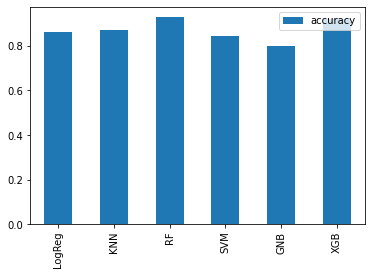

In [ ]:
# Visualize the accuracy of different models in a line graph
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot(kind = 'bar');

From the above graph, XGBoost and RandomForest Classifier are two of our best models. In the next section, we will be trying to tune these models with hyperparameter grid. 

## Tuning Hyperparameters
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tuning RandomClassifier with RandomizedSearchCV 

In [ ]:
%%time
# Create a hyperparameter grid for RandomForest
rf_cv_grid = {'n_estimators': np.arange(10, 1000, 50),
              'max_depth': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)}

# Tune RandomForestClassifier
# Setup random seed 
np.random.seed(42)

# Setup RandomizedSearchCV hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_cv_grid,
                           cv = 5,
                           n_iter = 30,
                           verbose = True)

# Fit training data to the RandomizedSearchCV hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 2min 41s, sys: 895 ms, total: 2min 42s
Wall time: 2min 42s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf.score(x_val, y_val)

0.9129411764705883

### Tuning XGBoost Classifier with RandomizedSearchCV 
Ways to tune XGBoost can be found here:
https://www.kaggle.com/search


In [ ]:
%%time
# Create a hyperparameter grid for RandomForest
xg_cv_grid = {'min_child_weight': np.arange(1, 10, 1),
              'gamma': [0.5, 1, 1.5, 2, 5],
              'colsample_bytree': np.arange(0.2, 1.0, 0.2),
              'max_depth': np.arange(1, 10, 2)}

# Tune RandomForestClassifier
# Setup random seed 
np.random.seed(42)

# Setup RandomizedSearchCV hyperparameter search for RandomForestClassifier
rs_xg = RandomizedSearchCV(XGBClassifier(),
                           param_distributions = xg_cv_grid,
                           cv = 5,
                           n_iter = 30,
                           verbose = True)

# Fit training data to the RandomizedSearchCV hyperparameter search for RandomForestClassifier
rs_xg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 40.2 s, sys: 472 ms, total: 40.7 s
Wall time: 40.7 s


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=30,
                   param_distributions={'colsample_bytree': array([0.2, 0.4, 0.6, 0.8]),
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': array([1, 3, 5, 7, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=True)

In [ ]:
rs_xg.best_params_

{'min_child_weight': 3, 'max_depth': 7, 'gamma': 1, 'colsample_bytree': 0.4}

In [ ]:
rs_xg.score(x_val, y_val)

0.9341176470588235

The above evaluation score of 0.93.. shows that there has been a decrease in the score for XGBoostClassifier but it is still the highest.

### Tuning XGBoost Classifier with  GridSearchCV 
Since the XGBoost Classifier model is the best model, we can tune it further with GridSearchCV

In [ ]:
%%time
# Different hyperparameters for Logistic Regression model 
# Applying liblinear solver to the data 
xg_gs_grid = {'min_child_weight': np.arange(1, 10, 1),
              'gamma': [0.5, 1, 1.5, 2, 5],
              'colsample_bytree': np.arange(0.2, 1.0, 0.2),
              'max_depth': np.arange(1, 10, 2)}

# Setup grid hyperparameters search for Logistic Regression model
gs_xg = GridSearchCV(XGBClassifier(),
                     param_grid = xg_gs_grid,
                     cv = 5, 
                     verbose = True)

# Fit grid hyperparameter search model 
gs_xg.fit(x_train, y_train);

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
CPU times: user 17min 59s, sys: 11.8 s, total: 18min 11s
Wall time: 18min 9s


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': array([0.2, 0.4, 0.6, 0.8]),
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': array([1, 3, 5, 7, 9]),
                         'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=True)

In [ ]:
gs_xg.best_params_

{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 9, 'min_child_weight': 7}

In [ ]:
# To evaluate the XGBoost Classifier model on the test data using GridSearchCV
gs_xg.score(x_val, y_val)

0.9317647058823529

In [ ]:
# Make predictions with our tuned XGBoostClassifier model 
y_pred = gs_xg.predict(x_test)
y_prob_pred = gs_xg.predict_proba(x_test)

In [ ]:
y_prob_pred

array([[0.978, 0.019, 0.004],
       [0.984, 0.006, 0.009],
       [0.959, 0.027, 0.014],
       ...,
       [0.996, 0.003, 0.001],
       [0.984, 0.01 , 0.006],
       [0.635, 0.352, 0.013]], dtype=float32)

# 6. Evaluation Metrics
If we can reach 95% accuracy in predicting whether or not there is fetal abnormality during the proof of concept, we will pursue the project. 

The following evaluation metrics will be used to evaluate the tuned model:

* Accuracy 
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

https://www.kaggle.com/code/nkitgupta/evaluation-metrics-for-multi-class-classification/notebook


## ROC Curve and AUC Score 
This is a multi class problem and although ROC and AUC score is used for binary classifications, adjustments can be made for multiclass problems such as this by using the one vs rest argument.
Example for this: https://blog.ineuron.ai/AUC-ROC-score-and-curve-in-multiclass-classification-problems-2ja4jOHb2X

In [ ]:
# Find the roc auc score for the midel above 
roc_auc_score(y_test, y_prob_pred, multi_class = 'ovr', average = 'weighted')

0.9841121092393363

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


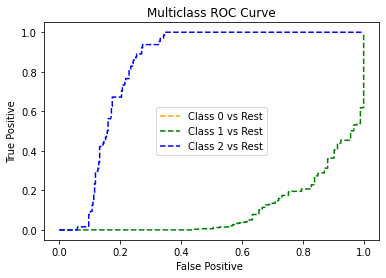

In [ ]:
# Find the roc curve for classes 
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:, i], pos_label = i)

# Plotting 
plt.plot(fpr[0], tpr[0], linestyle = '--', color = 'orange', label = 'Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle = '--', color = 'green', label = 'Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle = '--', color = 'blue', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive ')
plt.ylabel('True Positive')
plt.legend(loc = 'best');
# plt.savefig('Multiclass ROC, dpi = 300');

## Accuracy 

### Finding accuracy using a python function 

In [ ]:
def accuracy(y_true, y_pred):
  '''
  Function to calculate accuracy 
  --> y_true: list of true values 
  --> y_pred: list of predicted values 
  --> return: accuracy score 
  '''
  # Initializing variable to store count of correctly predicted classes 
  correct_predictions = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp: 
      correct_predictions += 1
  # returns accuracy 
  return correct_predictions/ len(y_true)

# Get accuracy score  
accuracy(y_test, y_pred)

0.9553990610328639

### Finding accuracy using scikit learn



In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.9553990610328639


From the results above, the goal of 95% percent accuracy has been achieved.

## Precision 
This measures how many of correctly predicted fetal health labels actually have show those fetal health characteristics. 

To calculate precision, we need the true positive and negative values as well as false positive and negative values. 

And there are two ways to get precision for a multiclass problem: 

*   Micro precision 
*   Macro precison



### True Positive and Negatives, False Positives and Negatives 


In [ ]:
# Create a function to find true positive  
def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp ==1: 
      tp += 1
  return tp 

# Create a function to find true negatives 
def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0: 
      tn += 1
  return tn 

# Create a function to find false positive
def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1: 
      fp += 1
  return fp

# Create a function to find false negative 
def false_negative(y_true, y_pred): 
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn 


### Macro precison 

#### Finding macro precision using python function

In [ ]:
# Create a function to compute macro average precision 
def macro_precision(y_true, y_pred): 
  # find the number of classes 
  num_classes = len(np.unique(y_true))
  # initialize precision to 0 
  precision = 0 
  # loop over all classes 
  for class_ in list(y_true.unique()):
    # all classes except current are considered negative 
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # compute true positive for current class
    tp = true_positive(temp_true, temp_pred)
    
    # compute false positive for current class 
    fp = false_positive(temp_true, temp_pred)

    # compute precision for current class 
    temp_precision = tp/(tp + fp + 1e-6)
    # keep adding precision for all classes 
    precision += temp_precision

  # calculate and return average precision over all classes 
  precision /= num_classes 
    
  return precision 

In [ ]:
print(f'Macro-averaged Precision score : {macro_precision (y_test, y_pred) }')

Macro-averaged Precision score : 0.9286299016679175


#### Finding macro precision with scikit learn 

In [ ]:
macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')

print(f'Macro-averaged Precision score using sklearn library: {macro_averaged_precision}')

Macro-averaged Precision score using sklearn library: 0.9286299173998299


### Micro precision 

#### Finding micro precision with python function

In [ ]:
# Create a function to compute micro average precision 
def micro_precision(y_true, y_pred): 
  # find the number of classes 
  num_classes = len(np.unique(y_true))
  # initialize tp and fp to 0 
  tp = 0
  fp = 0 

  # loop over all classes 
  for class_ in y_true.unique():
    # all classes except current are considered negative 
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # compute true positive for current class and update overall tp
    tp += true_positive(temp_true, temp_pred)
    
    # compute false positive for current class and update overall tp 
    fp += false_positive(temp_true, temp_pred)

  # calculate and return average precision over all classes 
  precision = tp/(tp + fp) 
    
  return precision 

In [ ]:
print(f'Micro-averaged Precision score: {micro_precision(y_test, y_pred)}')

Micro-averaged Precision score: 0.9553990610328639


#### Finding micro precision with Scikit learn

In [ ]:
micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')

print(f'Micro-Averaged Precision score using sklearn library: {micro_averaged_precision}')

Micro-Averaged Precision score using sklearn library: 0.9553990610328639


## Recall 
There are two ways of calculating recall for multiclass problems. 

*   Macro recall 
*   Micro recall



### Macro Recall

#### Finding macro recall using a python function

In [ ]:
# Create a function to compute macro average recall 
def macro_recall(y_true, y_pred): 
  # find the number of classes 
  num_classes = len(np.unique(y_true))

  # initialize recall to 0 
  recall = 0

  # loop over all classes 
  for class_ in list(y_true.unique()):
    # all classes except current are considered negative 
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # compute true positive for current class
    tp = true_positive(temp_true, temp_pred)
    
    # compute false positive for current class
    fn = false_positive(temp_true, temp_pred)

    # compute recall for current class 
    temp_recall = tp/(tp + fn + 1e-6)

    # Keep adding recall for all classes 
    recall += temp_recall

  # calculate and return average precision over all classes 
  recall /= num_classes 
    
  return recall 

In [ ]:
print(f'Macro-averaged recall score : {macro_recall (y_test, y_pred) }')

Macro-averaged recall score : 0.9286299016679175


#### Finding macro averaged recall using scikit learn


In [ ]:
macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f'Macro-averaged recall score using sklearn: {macro_averaged_recall}')

Macro-averaged recall score using sklearn: 0.9304929929929929


### Micro Recall


#### Finding micro recall using python function

In [ ]:
# Create a function to compute micro average recall 
def micro_recall(y_true, y_pred): 

  # find the number of classes 
  num_classes = len(np.unique(y_true))
  # initialize tp and fn to 0 
  tp = 0
  fn = 0 

  # loop over all classes 
  for class_ in y_true.unique():

    # all classes except current are considered negative 
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # compute true positive for current class and update overall tp
    tp += true_positive(temp_true, temp_pred)
    
    # compute false positive for current class and update overall tp 
    fn += false_negative(temp_true, temp_pred)

  # calculate and return overall recall over all classes 
  recall = tp / (tp + fn)   
  return recall 

In [ ]:
print(f'Micro-averaged recall score : {micro_recall (y_test, y_pred) }')

Micro-averaged recall score : 0.9553990610328639


#### Finding micro recall using Scikit Learn 

In [ ]:
micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f'Micro-averaged recall score using sklearn: {micro_averaged_recall}')

Micro-averaged recall score using sklearn: 0.9553990610328639


## F1 Score
This can be calculated in two ways: 

*   Macro F1
*   Micro F1



### Macro F1 

#### Finding macro f1 using a python function

In [ ]:
# Using a function to compute a macro-averaged f1 score 
def macro_f1(y_true, y_pred):

  # find the number of classes 
  num_classes = len(np.unique(y_true))

  # initialize f1 to 0
  f1 = 0

  # loop over all classes 
  for class_ in list(y_true.unique()):

    # all classes except current are considered negative 
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    # compute true positive for current class
    tp = true_positive(temp_true, temp_pred)

    # compute false negative for current class
    fn = false_negative(temp_true, temp_pred)

    # compute false positive for current class
    fp = false_positive(temp_true, temp_pred)

    # compute recall for current class 
    temp_recall = tp/(tp + fn + 1e-6)

    # compute precision for current class
    temp_precision = tp/(tp + fp + 1e-6)

    temp_f1 = 2 * temp_precision * temp_recall/ (temp_precision + temp_recall + 1e-6)

    # keep adding f1 score for all classes 
    f1 += temp_f1

  # calculate and return average f1 score over all classes 
  f1 /= num_classes
  return f1

In [ ]:
print(f'Macro-averaged f1 score: {macro_f1(y_test, y_pred)}')

Macro-averaged f1 score: 0.9278188624453844


#### Finding macro f1 score with scikit learn

In [ ]:
macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')

In [ ]:
print(f'Macro-averaged f1 score: {macro_f1(y_test, y_pred)}')

Macro-averaged f1 score: 0.9278188624453844


### Micro F1

#### Finding micro f1 using a python function

In [ ]:
# Create a function to compute micro average recall
def micro_f1(y_true, y_pred): 

  # micro-averaged precision score 
  P = micro_precision(y_true, y_pred)

  # micro-averaged recall score 
  R = micro_recall(y_true, y_pred)

  # micro-averaged f1 score 
  f1 = 2*P*R / (P + R) 
  
  return f1

In [ ]:
print(f'Micro-averaged f1 score: {micro_f1(y_test, y_pred)}')

Micro-averaged f1 score: 0.9553990610328639


#### Finding the micro f1 score with scikit learn 


In [ ]:
micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')

print(f'Micro-averaged F1 score using sklearn library: {micro_averaged_f1}')

Micro-averaged F1 score using sklearn library: 0.9553990610328639


## Confusion Matrix


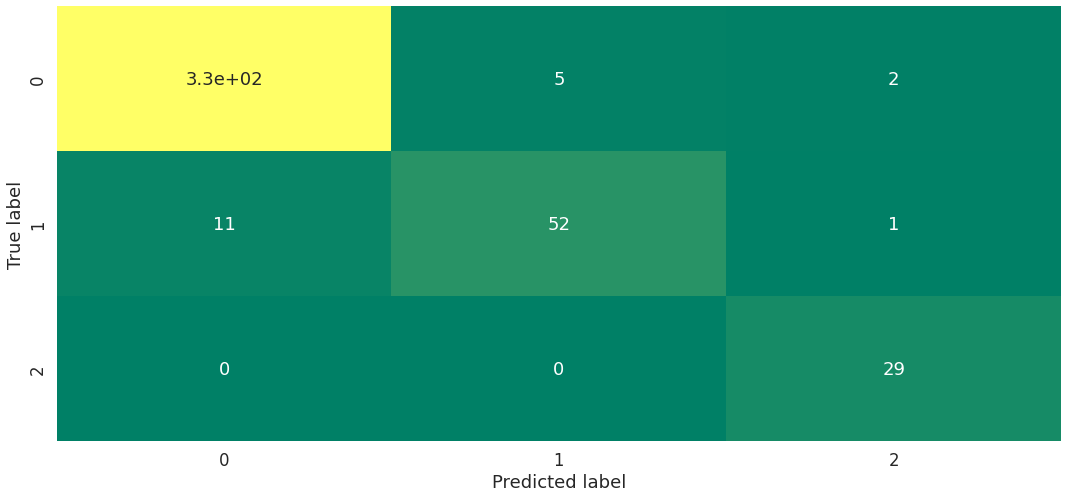

In [ ]:
# Plot confusion matrix 
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_pred):
  '''
  Plots a confusion matrix using Seaborn's heatmap
  '''
  fig, ax = plt.subplots(figsize = (18, 8))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False,
                   cmap = 'summer')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

plot_conf_mat(y_test, y_pred);

## Feature Importance 
Feature importance is another way of asking which features contributed most to the outcomes of the model and how they contributed. 

In [ ]:
# Fit the XGBoost Classifier using the best GridSearch parameterss
clf = XGBClassifier(colsample_bytree = 0.8, 
                    gamma = 1, 
                    max_depth = 9, 
                    min_child_weight = 7,
                    booster = 'gblinear')
clf.fit(x_train, y_train);

The default XGBoost model booster 'gbtree' or 'dart' does not give a coefficient option so I had to swith out the booster to 'gblinear' to get the feature importance.

In [ ]:
clf.score(x_val, y_val)

0.8329411764705882

In [ ]:
# Check the coefficient of the model 
clf.coef_

array([[ 0.001, -0.   , -0.001,  0.   , -0.   , -0.   , -0.002,  0.   ,
         0.002,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
         0.   ,  0.   , -0.   ,  0.   ,  0.   ],
       [-0.016,  0.007,  0.02 ,  0.017, -0.028,  0.012, -0.035,  0.016,
         0.029,  0.023,  0.028, -0.066,  0.004, -0.006,  0.   ,  0.003,
        -0.   , -0.004,  0.002, -0.001, -0.001],
       [-0.017,  0.016,  0.006,  0.005, -0.006,  0.001,  0.003, -0.   ,
        -0.006,  0.003, -0.   , -0.005,  0.002, -0.   , -0.004, -0.012,
        -0.011,  0.021,  0.008,  0.009, -0.017]])

In [ ]:
# Match coefficient features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'baseline value': 0.00112391,
 'accelerations': -0.000457853,
 'fetal_movement': -0.00094888,
 'uterine_contractions': 0.00029466,
 'light_decelerations': -0.000176712,
 'severe_decelerations': -0.000118077,
 'prolongued_decelerations': -0.00199529,
 'abnormal_short_term_variability': 0.000394834,
 'mean_value_of_short_term_variability': 0.00159727,
 'percentage_of_time_with_abnormal_long_term_variability': 0.000221228,
 'mean_value_of_long_term_variability': -0.000170833,
 'histogram_width': -5.07093e-05,
 'histogram_min': 1.04956e-05,
 'histogram_max': -4.72846e-05,
 'histogram_number_of_peaks': 3.60268e-05,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 0.0,
 'histogram_mean': 0.0,
 'histogram_median': -6.30734e-05,
 'histogram_variance': 5.62177e-06,
 'histogram_tendency': 5.73136e-05}

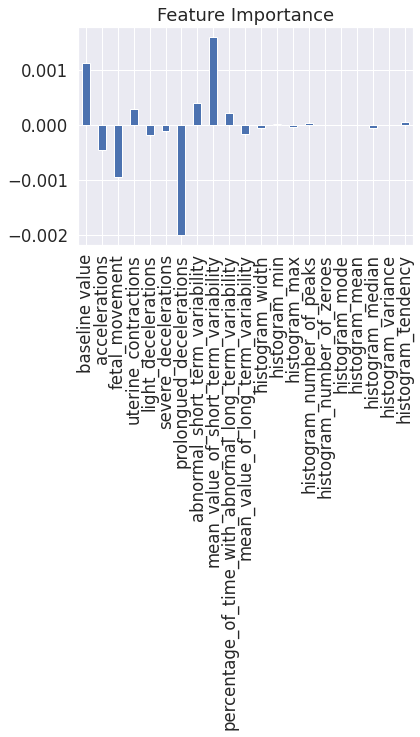

In [ ]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

From the above figure, mean value of short term variability is more closely correlated with abnormal fetal health while prolongued decelerations has negative correlation

# Conclusion
The goal of this project was to find a model that could accurately predict the fetal health of 95% of a given dataset. After much experimentation with RandomizedSearchCV and GridSearchCV, XGBoostClassifier was found to be best model which met our evaluation criteria. Mean value of short term variability was found to be the most important feature. 



# Future Research Ideas
Future research include: 

*   Can we use Tensorflow for multiclass classfication problems?
*   What other XGBoost Classifier parameters can we use, check: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.coef_



